In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

カーネル密度関数に関する説明
https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E5%AF%86%E5%BA%A6%E6%8E%A8%E5%AE%9A

(0, 1)

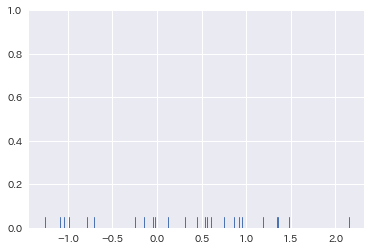

In [2]:
np.random.seed(13)
dataset = randn(25)
# rugplotを書きます
sns.rugplot(dataset)  # dataがあるところに線が描かれる。
plt.ylim(0,1)

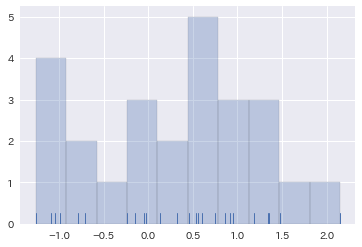

In [24]:
# ヒストグラムを重ねます。
plt.hist(dataset,alpha=0.3) # ec='black'　
sns.rugplot(dataset)

バンド幅の推定<br>
http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

(0, 1)

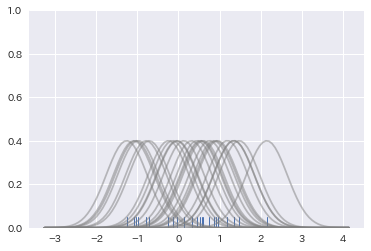

In [26]:
sns.rugplot(dataset);

# X軸を設定
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 全体を等間隔に100分割します。
x_axis = np.linspace(x_min,x_max,100)
# wiki と同じようにバンド幅を推定。
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []

for data_point in dataset:
    # norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    # stats.norm(x, sig) ：平均x, 標準偏差sigの正規分布のオブジェクト？ができる。　　pdf(x_axis): x_axis についての確率密度関数の値を返す。
    # kernel = stats.norm.pdf(x_axis, loc=data_point, scale=bandwidth)  でもOK
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [29]:
np.sum(kernel_list, axis=0)

array([  3.97051433e-04,   7.32041577e-04,   1.32122183e-03,
         2.33447611e-03,   4.03831695e-03,   6.83963895e-03,
         1.13426187e-02,   1.84190664e-02,   2.92903161e-02,
         4.56154760e-02,   6.95766233e-02,   1.03946721e-01,
         1.52121403e-01,   2.18092479e-01,   3.06340417e-01,
         4.21626684e-01,   5.68675697e-01,   7.51750619e-01,
         9.74146496e-01,   1.23764587e+00,   1.54200251e+00,
         1.88453327e+00,   2.25990214e+00,   2.66016984e+00,
         3.07515600e+00,   3.49312042e+00,   3.90171983e+00,
         4.28914635e+00,   4.64531164e+00,   4.96291747e+00,
         5.23825547e+00,   5.47160867e+00,   5.66718196e+00,
         5.83255893e+00,   5.97775637e+00,   6.11401002e+00,
         6.25246427e+00,   6.40294614e+00,   6.57297962e+00,
         6.76714533e+00,   6.98682527e+00,   7.23030695e+00,
         7.49316904e+00,   7.76884157e+00,   8.04923124e+00,
         8.32532180e+00,   8.58769391e+00,   8.82694566e+00,
         9.03402507e+00,

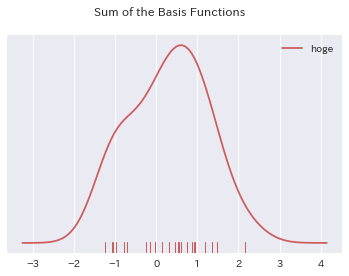

In [6]:
# 手動でKDE(カーネル密度推定）を作ります。
sum_of_kde = np.sum(kernel_list, axis=0)  # 今kenel_list は言うなれば　(25, 100)行列となっている   全ての正規分布を足し合わせる。

fig = plt.plot(x_axis,sum_of_kde,color='indianred', label='hoge')
plt.legend()  # labelを表示するために必要

sns.rugplot(dataset,c = 'indianred')

plt.yticks([])  # 　y軸を消す操作　空リストを渡せば良い。 yticks : y軸のメモリ

plt.suptitle("Sum of the Basis Functions")  # plt.suptitle(' ')ではいくつかのグラフを並べた際のスーパータイトル（全体の表題）を記述することができる


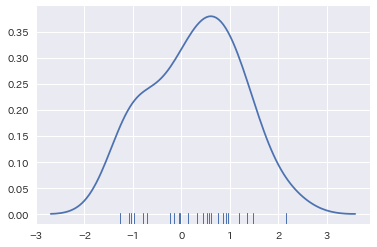

In [7]:
# これが1行で出来ます。
sns.kdeplot(dataset)
sns.rugplot(dataset)

In [8]:
np.arange(0.5, 2, 0.25)

array([ 0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75])

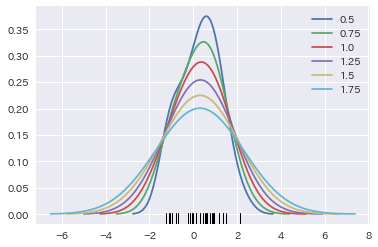

In [9]:
sns.rugplot(dataset,color='black')
# バンド幅を変えてみましょう。
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

カーネル関数の説明（英語）<br>
http://en.wikipedia.org/wiki/Kernel_(statistics)

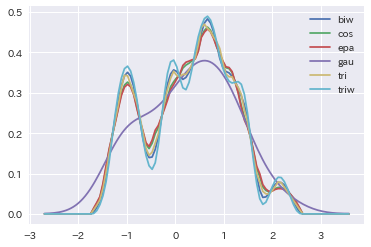

In [10]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern)

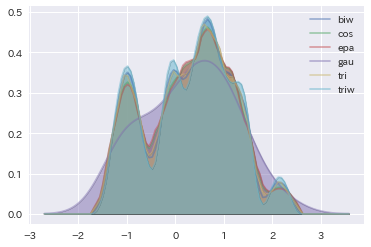

In [11]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

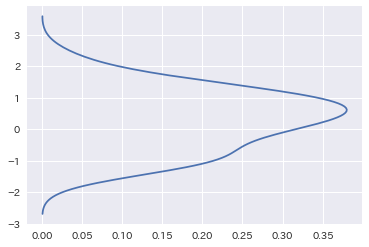

In [12]:
# 軸を入れ替えることもできます。
sns.kdeplot(dataset,vertical=True)

cumulative distribution function (CDF)<br>
累積分布関数<br>
http://en.wikipedia.org/wiki/Cumulative_distribution_function

(array([  4.,   6.,   7.,  10.,  12.,  17.,  20.,  23.,  24.,  25.]),
 array([-1.26160595, -0.92040705, -0.57920816, -0.23800927,  0.10318962,
         0.44438851,  0.7855874 ,  1.12678629,  1.46798518,  1.80918408,
         2.15038297]),
 <a list of 10 Patch objects>)

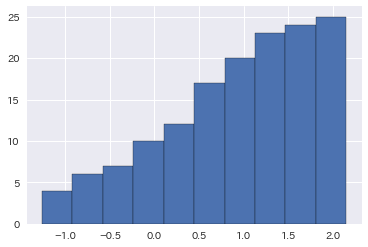

In [13]:
#累積分布関数は引数にcumulative=True　とすれば良い。
plt.hist(dataset, cumulative=True)

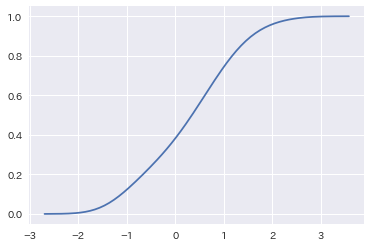

In [14]:
sns.kdeplot(dataset,cumulative=True)

,X,Y
0,0.753766,-7.123907
1,0.451812,-0.445031
2,0.532338,13.451017
3,0.861211,13.501879
4,-1.045377,14.786857
5,-1.261606,-7.889890
6,-0.243326,5.628468
7,0.317351,9.137407
8,2.150383,1.273033
9,-0.026772,6.062887


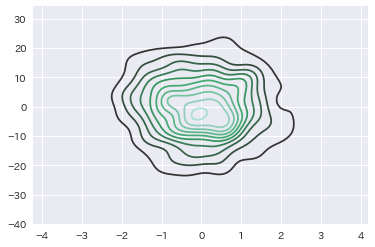

In [15]:
# 2次元平面上の中心
mean = [0,0]
# それぞれの分散を決めます。
cov = [[1,0],[0,100]] # 共分散行列
# これに従う多変量正規分布
np.random.seed(13)
dataset2 = np.random.multivariate_normal(mean,cov,1000)
# DataFrameにしておきましょう。
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
# プロットします。SeabornとPandasの相性は抜群
sns.kdeplot(dframe)
dframe

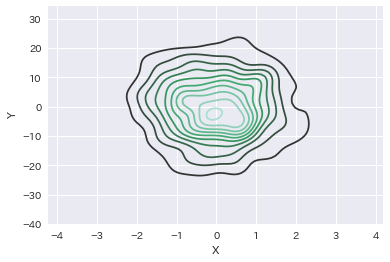

In [16]:
# 軸ごとにデータをわたせます。
sns.kdeplot(dframe.X,dframe.Y)  # DataFrameで作ると、そのcalumnsの名前をラベルにしてくれる。詳しい引数はドキュメント参照。

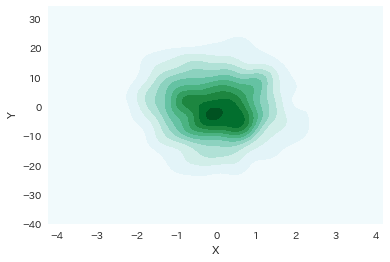

In [17]:
# 影もつけれます
sns.kdeplot(dframe.X,dframe.Y, shade=True)

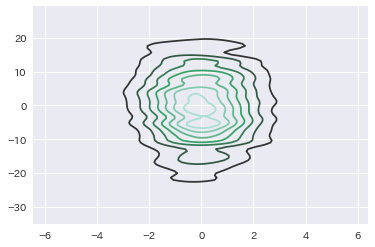

In [18]:
# バンド幅を変えられます。
sns.kdeplot(dframe,bw=1)

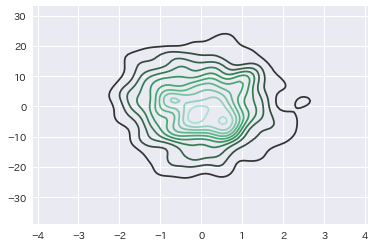

In [19]:
# 文字列（バンド幅の推定方法の名称）でも渡せます。  　詳しくはドキュメント参照
sns.kdeplot(dframe,bw='silverman')

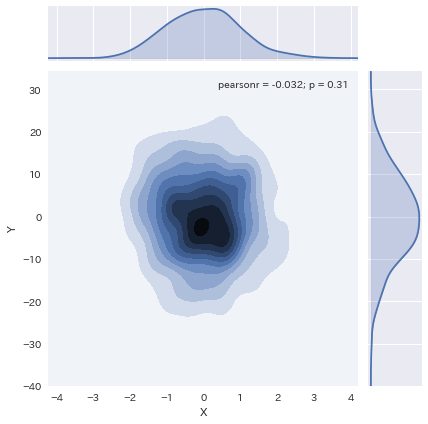

In [20]:
# 同時分布の推定も可能です。  
sns.jointplot(x='X', y='Y', data=dframe,kind='kde')  # x=x軸にしたいdframeの列名　　y=y軸にしたいdframeの列名　　data= x,yのデータが入ったdframe

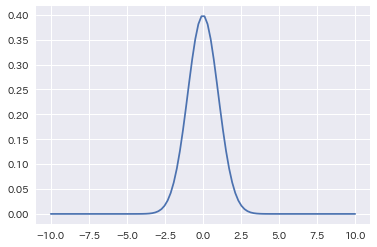

In [21]:
x = np.linspace(-10, 10, 100)
plt.plot(x, stats.norm.pdf(x))

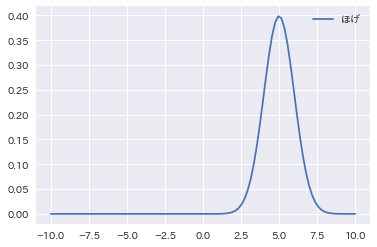

In [22]:
plt.plot(x, stats.norm.pdf(x, loc=5, scale=1), label='ほげ')
plt.legend()

In [23]:
y.std

NameError: name 'y' is not defined

In [ ]:
import matplotlib.pyplot as plt

x=[0,1,2,3,4,5]
y1=[0,1,2,3,4,5]
y2=[3,3,3,3,3,3]
y3=[1,2,3,4,5,6]
y4=[5,4,3,2,1,0]

plt.subplot(221)
plt.plot(x,y1)
plt.title('hoge')  # 図一つ一つのタイトル

plt.subplot(222)
plt.plot(x,y2)
plt.title('fuga')
plt.ylabel('fugayo')



plt.subplot(223)
plt.plot(x,y3)
plt.ylabel('fugayo')

plt.subplot(224)
plt.plot(x,y4)
plt.xlabel('hogeo')

plt.suptitle('hoge')
plt.show()


In [ ]:
mpl.rcdefaults()